# Challenges

Challenges are brief tasks designed to help you practice specific skills:

- 🗺️ Explore: Try to identify recessions in different countries.
- 📊 Visualise: Create a plot to visualize the change in GDP in your country over the past decade.
- 🔎 Analyse: Which country had the highest percentage growth in GDP over the past decade?

In [79]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [35]:
gdp = pl.read_csv("gdp.csv")
gdp.head()

Country Name,Country Code,Year,Value
str,str,i64,f64
"""Afghanistan""","""AFG""",2000,3.5214e9
"""Afghanistan""","""AFG""",2001,2.8136e9
"""Afghanistan""","""AFG""",2002,3.8257e9
"""Afghanistan""","""AFG""",2003,4.5209e9
"""Afghanistan""","""AFG""",2004,5.2249e9


## 🗺️ Explore: Try to identify recessions in different countries.

In [ ]:
random.seed(5)

country_codes = gdp['Country Code'].unique().to_list()
random_countries = random.sample(country_codes, 3)
print(f"Selected countries: {random_countries}")

Selected countries: ['GMB', 'MEX', 'GRC']


In [159]:
random_countries_df = gdp.filter(gdp['Country Code'].is_in(random_countries))

# Check the `Year` range for each country
for i in range(len(random_countries)):
    code = random_countries[i]
    print(f"Country code: {code}")
    print(f"Time range (Years): {random_countries_df.filter(random_countries_df['Country Code'] == code)['Year'].unique().len()}", "\n")

# Round `Values` to three significant figures
random_countries_df = random_countries_df.with_columns(
    pl.col("Value").round_sig_figs(3)
)

Country code: GMB
Time range (Years): 58 

Country code: MEX
Time range (Years): 64 

Country code: GRC
Time range (Years): 64 



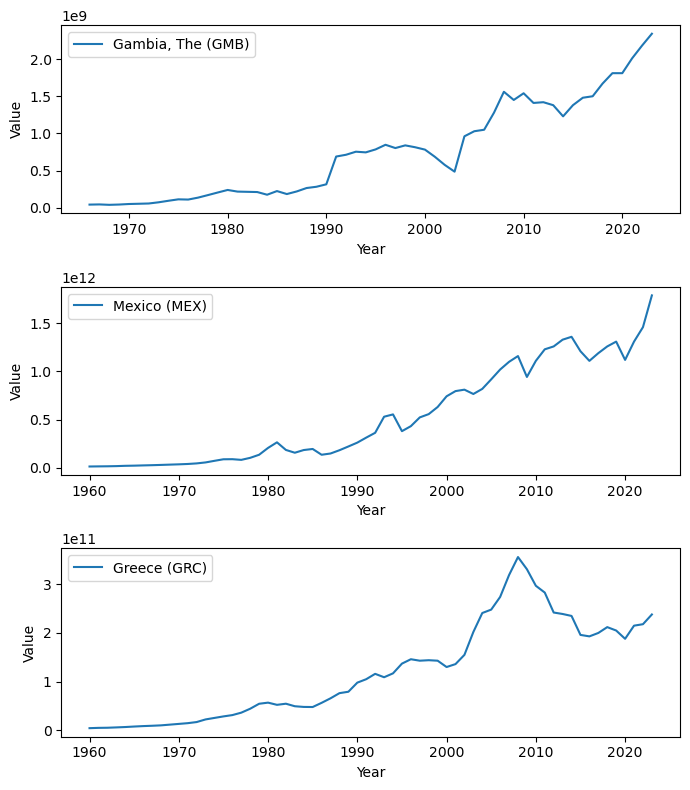

In [ ]:
n_figs = len(random_countries)
fig, axes = plt.subplots(n_figs, 1, figsize=(7, 8))

for i in range(n_figs):
    selected_country_code = random_countries[i]
    selected_country_name = gdp.filter(gdp['Country Code'] == selected_country_code)['Country Name'].unique().to_list()[0]
    selected_country_data = random_countries_df.filter(random_countries_df['Country Code'] == selected_country_code)
    sns.lineplot(data=selected_country_data, x='Year', y='Value', ax=axes[i], label=f"{selected_country_name} ({selected_country_code})")

plt.tight_layout()

## 📊 Visualise: Create a plot to visualize the change in GDP in your country over the past decade.

<Axes: xlabel='Year', ylabel='Value'>

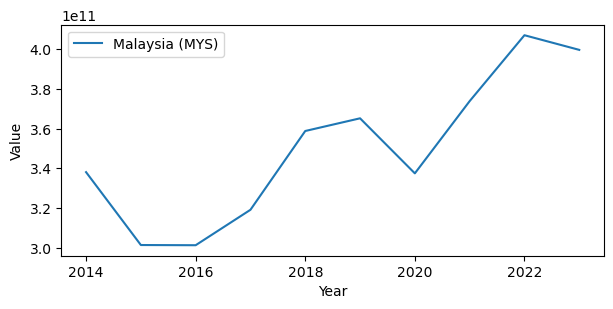

In [160]:
# Create a subset dataframe for Malaysia between 2013 and 2023 (past decade)
malaysia = gdp.filter((gdp['Country Name'] == 'Malaysia') & (gdp['Year'].is_between(2014, 2023)))
malaysia_code = malaysia['Country Code'].unique()

fig, ax = plt.subplots(figsize=(7, 3))

sns.lineplot(data=malaysia, x='Year', y='Value', ax=ax, label='Malaysia (MYS)')